<a href="https://colab.research.google.com/github/zaegeon/Python/blob/main/20220525_DA05_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 라이브러리 import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 셋

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Box Plot

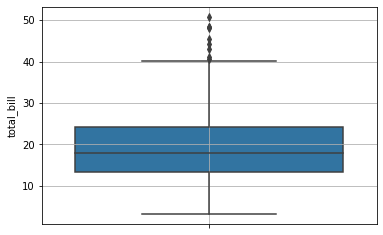

In [4]:
sns.boxplot(y = 'total_bill', data=tips)
plt.grid()
plt.show()

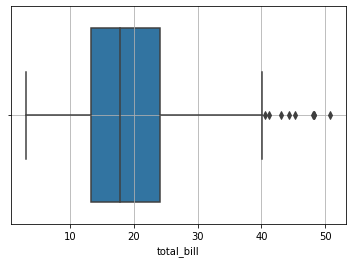

In [5]:
sns.boxplot(x = 'total_bill', data=tips)
plt.grid()
plt.show()

성별 tip의 box plot

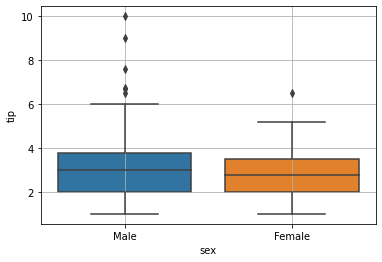

In [6]:
 sns.boxplot(x = 'sex', y = 'tip', data = tips)
 plt.grid()
 plt.show()

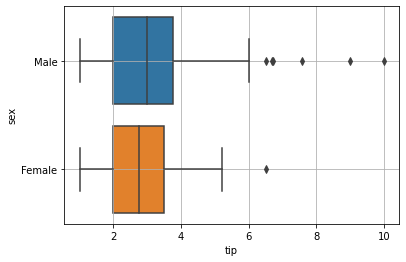

In [7]:
 sns.boxplot(x = 'tip', y = 'sex', data = tips)
 plt.grid()
 plt.show()

요일별 tip의 box plot

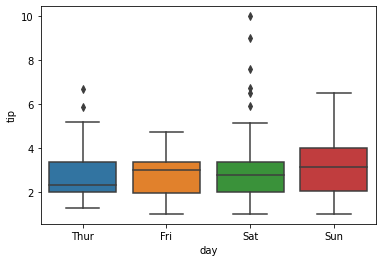

In [8]:
sns.boxplot(x = 'day', y = 'tip', data = tips)
plt.show() # 카테고리 순서대로 배열해서 show.

Subplot을 생성해서 각각 그래프 그리기

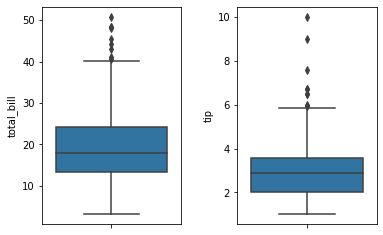

In [9]:
fig, ax = plt.subplots(1, 2)

sns.boxplot(y = 'total_bill', data = tips, ax = ax[0])
sns.boxplot(y = 'tip', data=tips, ax = ax[1])

plt.subplots_adjust(wspace = 0.4)
plt.show()

2개의 Subplot에 흡연여부별 tip, 시간별 tip의 box plot

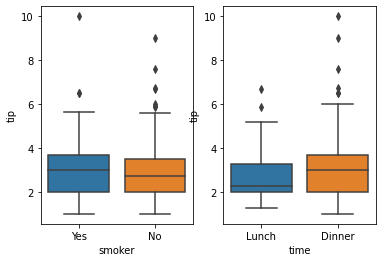

In [10]:
fig, ax = plt.subplots(1, 2)

sns.boxplot(x = 'smoker', y = 'tip', data = tips, ax = ax[0])
sns.boxplot(x = 'time', y = 'tip', data = tips, ax = ax[1])

plt.show()

total_bill 히스토그램을 세로 막대로 표현

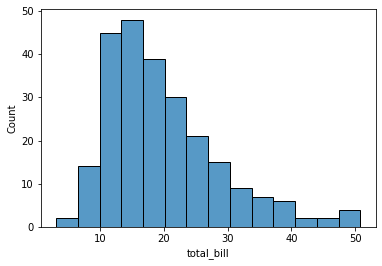

In [11]:
sns.histplot(x = 'total_bill', data = tips)
plt.show()

total_bill 히스토그램을 가로 막대로 표현

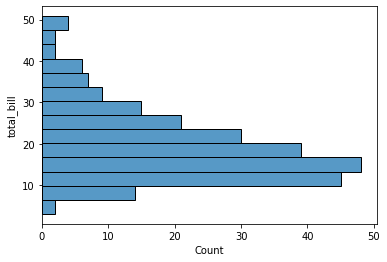

In [12]:
sns.histplot(y = 'total_bill', data = tips)
plt.show()

*   Subplot 2개를 상/하로 생성
*   위쪽 Subplot에는 tip의 box plot을 가로 방향으로 그림.
*   아래쪽 Subplot에는 tip의 히스토그램을 그림.

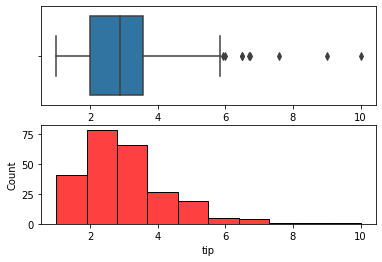

In [13]:
fig, ax = plt.subplots(2, 1)

sns.boxplot(x = 'tip', data = tips, ax = ax[0])
sns.histplot(x = 'tip', data = tips, ax = ax[1], bins=10, color='red')

plt.show()

# Bar plot

## `countplot()`

카테고리 타입 변수(칼럼)의 빈도수(count, frequency)를 막대로 표현한 그래프

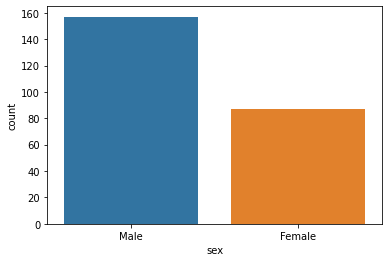

In [14]:
# 성별 빈도수
sns.countplot(x = 'sex', data=tips)
plt.show()

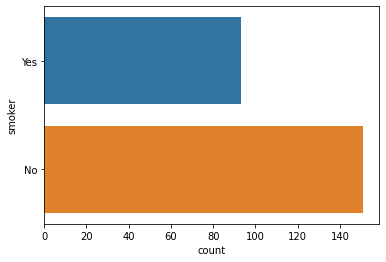

In [15]:
# 흡연자 / 비흡연자 가로 막대 그래프
sns.countplot(y = 'smoker', data=tips)
plt.show()

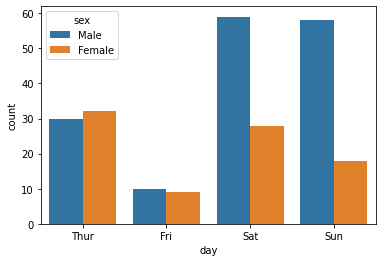

In [16]:
# 요일별 성별 빈도수
sns.countplot(x='day', hue='sex', data=tips)  # hue parameter : 카테고리 별로 색깔을 다르게 시각화할 때 사용.
plt.show()

In [17]:
print(tips[tips['day'] == 'Thur']['sex'].value_counts())
print(tips[tips['day'] == 'Fri']['sex'].value_counts())
print(tips[tips['day'] == 'Sat']['sex'].value_counts())
print(tips[tips['day'] == 'Sun']['sex'].value_counts())

Female    32
Male      30
Name: sex, dtype: int64
Male      10
Female     9
Name: sex, dtype: int64
Male      59
Female    28
Name: sex, dtype: int64
Male      58
Female    18
Name: sex, dtype: int64


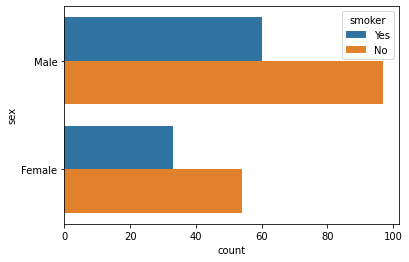

In [18]:
# 성별 흡연 / 비흡연자 수 가로 막대 그래프
sns.countplot(y='sex', hue='smoker', data=tips)
plt.show()

In [19]:
# 남성 흡연 / 비흡연자 수
print(tips[tips.sex == 'Male']['smoker'].value_counts())
print(tips[tips.sex == 'Female']['smoker'].value_counts())

No     97
Yes    60
Name: smoker, dtype: int64
No     54
Yes    33
Name: smoker, dtype: int64


## `barplot`

* 그룹별 변수(컬럼)의 기술 통계량(평균, 중앙값, 최댓값, ... )을 막대로 시각화.
* 카테고리 타입 변수와 연속형 변수의 통계량을 함께 시각화.

In [20]:
# 남성 tip의 평균
print(tips[tips['sex'] == 'Male']['tip'].mean())
# 여성 tip의 평균
print(tips[tips.sex == 'Female'].tip.mean())

3.0896178343949043
2.8334482758620685


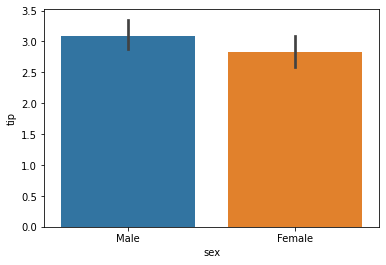

In [21]:
sns.barplot(x='sex', y='tip', data=tips)
# estimator parameter : 연속형 변수의 통계량을 계산할 함수를 지정. default : mean()
plt.show()

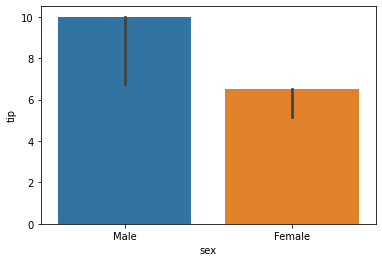

In [22]:
# 성별 tip의 최댓값
sns.barplot(x='sex', y='tip', data=tips, estimator=np.max)
plt.show()

In [23]:
tips[tips.sex == 'Male'].tip.max()

10.0

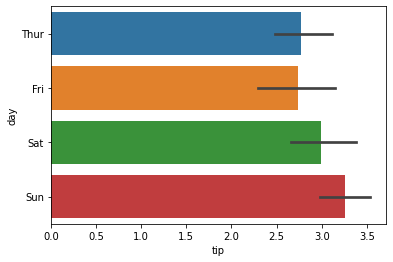

In [24]:
# 요일별 tip의 평균 가로 막대 그래프
sns.barplot(x='tip', y='day', data=tips)
plt.show()

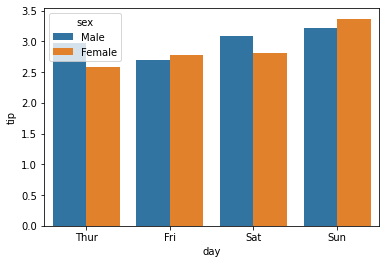

In [25]:
# 요일별 성별 tip의 평균 세로 막대 그래프
sns.barplot(x='day', y='tip', hue='sex', data=tips, ci=None)
plt.show()

# 산점도(Scatter Plot)

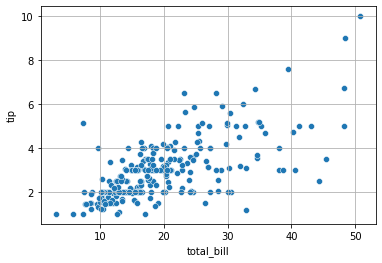

In [26]:
# tip ~ total_bill
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.grid()
plt.show()

## `regplot()`

regression plot : 산점도 + 선형 회귀 직선

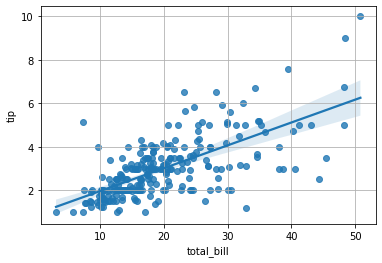

In [27]:
sns.regplot(x='total_bill', y='tip', data=tips)
plt.grid()
plt.show()

## `jointplot()`

jointplot : 산점도 + 히스토그램

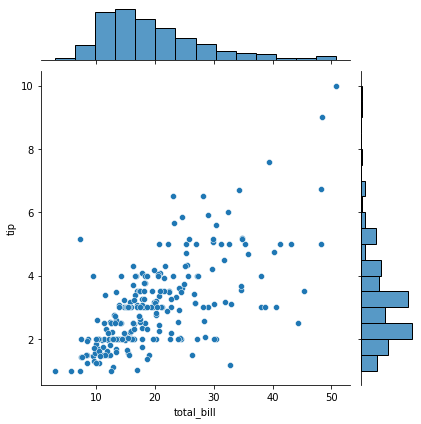

In [28]:
sns.jointplot(x='total_bill', y='tip', data=tips)
plt.show()

tip ~ total_bill 산점도

marker 색깔을 성별에 따라 다르게 시각화.

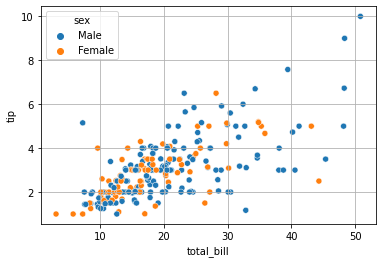

In [29]:
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=tips)
plt.grid()
plt.show()

tip ~ total_bill 산점도

marker 색깔은 성별에 따라서, marker 크기를 인원수에 따라서 다르게 시각화.

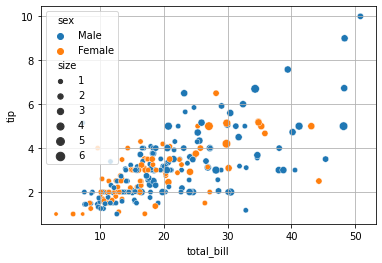

In [30]:
sns.scatterplot(x='total_bill', y='tip', hue='sex', size='size', data=tips)
plt.grid()
plt.show()

tip ~ total_bill 산점도

marker 색깔은 성별에 따라서, marker 모양을 흡연여부에 따라서 다르게 시각화.

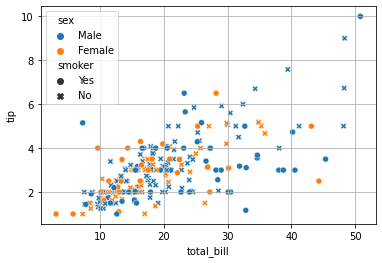

In [31]:
sns.scatterplot(x='total_bill', y='tip', hue='sex', style='smoker', data=tips)
plt.grid()
plt.show()

# 선 그래프(Line Plot)

In [32]:
np.random.seed(1)
df = pd.DataFrame({'x1' : np.arange(1, 11),
                   'x2' : np.random.rand(10)})
df

,x1,x2
0,1,0.417022
1,2,0.720324
2,3,0.000114
3,4,0.302333
4,5,0.146756
5,6,0.092339
6,7,0.186260
7,8,0.345561
8,9,0.396767
9,10,0.538817


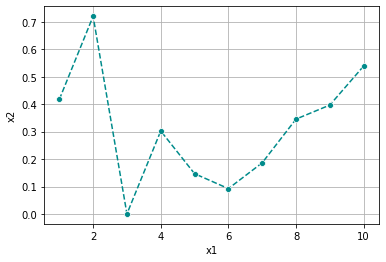

In [33]:
sns.lineplot(x='x1', y='x2', data=df, marker='o', linestyle='--', color='#008b8b')
plt.grid()
plt.show()

# Category Plot

카테고리 별로 Subplot을 생성하고 통계값(평균, 중앙값, ...)을 계산해서 모든 Subplot에 같은 종류의 그래프들을 시각화하는 방법.

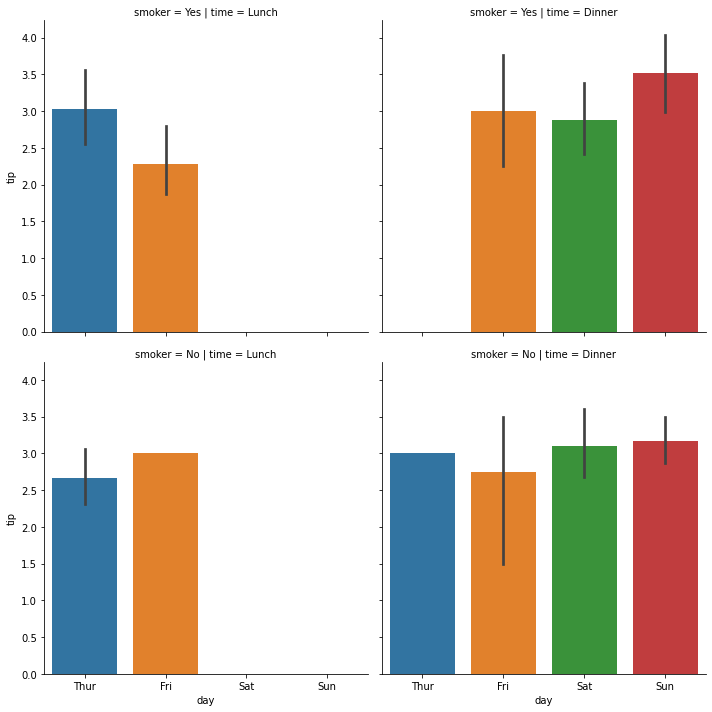

In [34]:
# 요일(x축)별 tip(y축)의 평균을 막대 그래프(그래프 종류)로 시각화.
# 흡연여부(subplot의 row)별, 시간(subplot의 column)별로 각각 Subplot들을 생성.
sns.catplot(x='day', y='tip', data=tips,
            kind='bar',                 # kind : 그래프 종류(bar, box, strip, count, ...)
            estimator=np.mean,          # estimator : 통계 계산 함수. default : np.mean
            row='smoker',               # row : subplot의 행들을 나눌 기준이 되는 카테고리 변수(컬럼)
            col='time'                  # col : subplot의 열들을 나눌 기준이 되는 카테고리 변수(컬럼)
            )
plt.show()

In [35]:
# 흡연자 점심 시간 목요일 tip의 평균
tips[(tips.smoker == 'Yes') & (tips.time == 'Lunch') & (tips.day == 'Thur')].tip.mean()

3.03

In [36]:
# 흡연자 점심 시간 금요일 tip의 평균
tips[(tips.smoker == 'Yes') & (tips.time == 'Lunch') & (tips.day == 'Fri')].tip.mean()

2.28

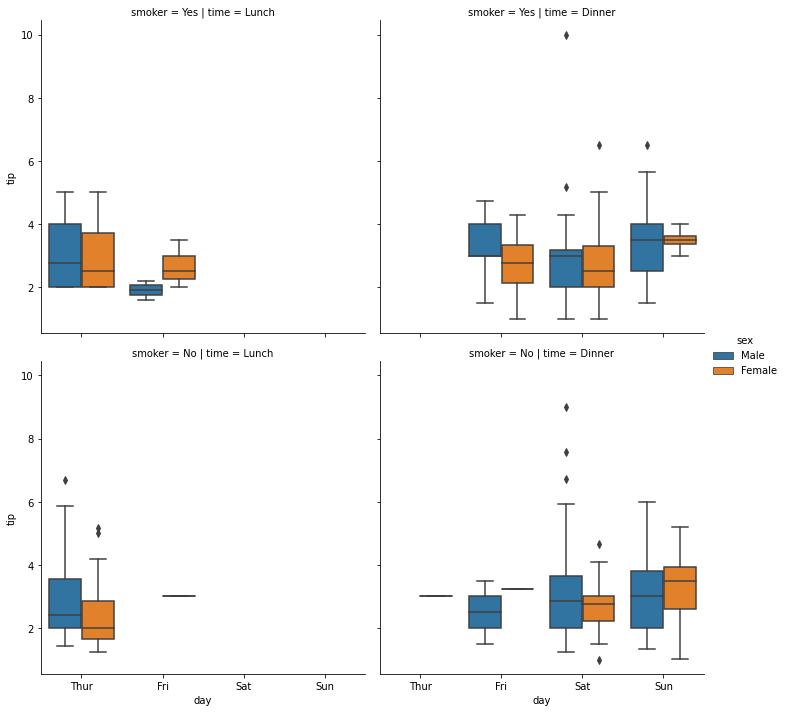

In [37]:
# 요일(x축)별 tip(y축)의 평균을 box plot(그래프 종류)로 시각화.
# 흡연여부(subplot의 row)별, 시간(subplot의 column)별로 각각 Subplot들을 생성.
# 막대의 색깔을 성별에 따라서 다르게 시각화.
sns.catplot(x='day', y='tip', data=tips, kind='box',
            estimator=np.mean, row='smoker', col='time',
            hue='sex',ci=None
            )
plt.show()

# Exercise - iris 데이터 셋

* seaborn 패키지의 예제 데이터 셋 'iris'를 DataFrame으로 생성.
* 데이터 프레임을 탐색 - 출력, 요약 정보, 기술 통계량, 카테고리 타입 변수의 빈도수
* 품종별로 Subplot을 생성해서 모든 숫자 타입 변수의 box plot을 시각화.
* petal_width ~ petal_length 산점도. 품종별로 색깔을 다르게 시각화.
* 모든 연속형 변수들 간의 상관 관계를 시각화. (Pair Plot)

In [38]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [39]:
iris.info() # 요약 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [40]:
iris.describe() # 기술 통계량

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
iris.species.value_counts() # 카테고리 타입 변수의 빈도수

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [51]:
i_set = iris[['sepal_length','sepal_width','petal_length','petal_width']]
i_set.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


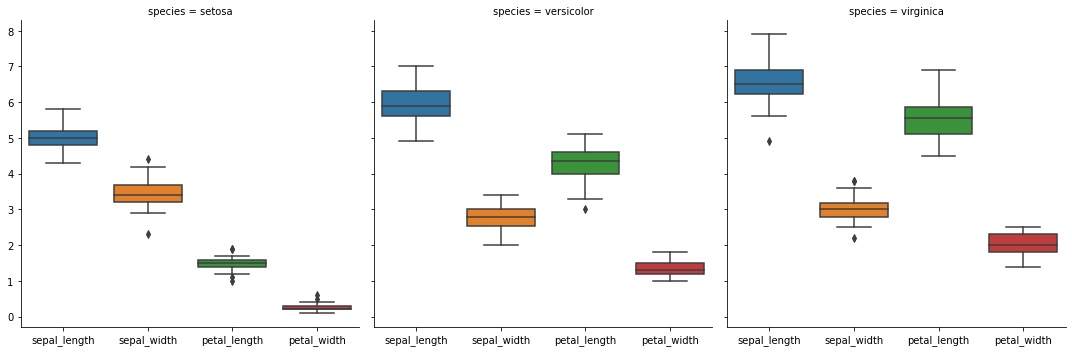

In [44]:
sns.catplot(data=iris, kind='box', col='species')
plt.show()

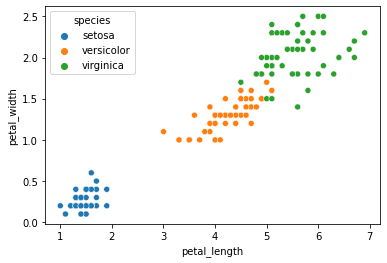

In [45]:
sns.scatterplot(x='petal_length', y='petal_width', data=iris, hue='species')
plt.show()

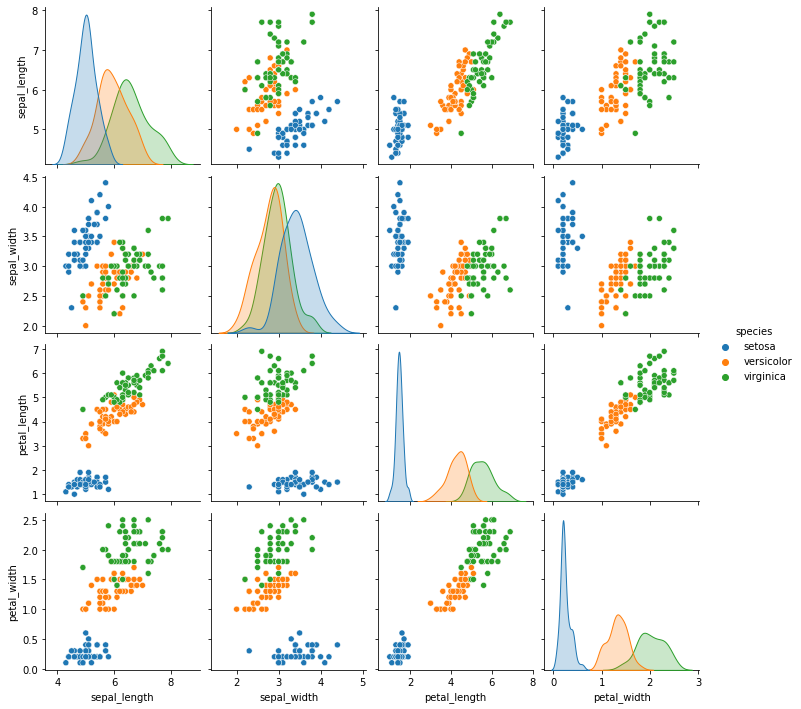

In [46]:
sns.pairplot(iris, hue='species')
plt.show()